# (In)Direct from the Source

link: https://xeek.ai/challenges/in-direct-from-the-source/overview

In [98]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import seaborn as sns

sns.set_style("whitegrid")

# Предобработка данных

## Загрузка данных и визуализация

In [99]:
df = pd.read_csv('train.csv', index_col=0)
df.head(5)

,Lab,y,x,19,20,21,22,23,24,25,26,27,28,29,30,31,32,OL,GA
Sample,,,,,,,,,,,,,,,,,,,
0,Lab_2,380,590,20.763486,13.947363,1.952259,16.486101,0.000000,4.700927,0.000000,22.170079,9.838302,0.000000,9.655032,4.117457,1.156801,25.926844,6.734488,4.471749
1,Lab_1,140,470,118.643361,130.716833,1152.234830,0.000000,0.000000,97.190520,183.275260,172.616987,74.513555,227.625892,85.241758,23.851172,0.000000,200.715642,75.290342,0.000000
2,Lab_1,350,440,123.998274,119.186570,0.000000,157.329488,9.416534,66.115133,116.153357,141.570068,0.000000,195.406313,51.625043,19.935382,57.203727,0.000000,42.262010,33.352354
3,Lab_2,790,160,13.753847,18.599869,1555.472651,9.205427,7.676030,23.369460,18.861401,0.000000,6.889721,18.959263,6.308057,8.018402,0.000000,18.181328,5.072130,15.635603
4,Lab_3,240,600,22.143712,20.548714,5.660628,21.590330,7.199149,16.221228,28.281983,24.309612,7.921879,31.266928,15.366561,6.013449,5.000000,25.824537,17.897014,7.305632


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lab     80 non-null     object 
 1   y       80 non-null     int64  
 2   x       80 non-null     int64  
 3   19      80 non-null     float64
 4   20      80 non-null     float64
 5   21      80 non-null     float64
 6   22      80 non-null     float64
 7   23      80 non-null     float64
 8   24      80 non-null     float64
 9   25      80 non-null     float64
 10  26      80 non-null     float64
 11  27      80 non-null     float64
 12  28      80 non-null     float64
 13  29      80 non-null     float64
 14  30      80 non-null     float64
 15  31      80 non-null     float64
 16  32      80 non-null     float64
 17  OL      80 non-null     float64
 18  GA      80 non-null     float64
dtypes: float64(16), int64(2), object(1)
memory usage: 12.5+ KB


In [101]:
df.iloc[:, 3:].describe()

,19,20,21,22,23,24,25,26,27,28,29,30,31,32,OL,GA
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,53.995146,52.968057,287.763588,54.686017,13.374795,39.686747,70.218122,55.719074,30.570730,81.303271,31.744038,17.346608,33.190267,78.360287,28.098199,25.735842
std,64.575781,62.583759,575.647700,79.729861,27.541256,59.887212,86.898960,82.839628,41.420514,100.482545,39.134086,33.874675,57.960619,102.807647,44.964391,36.576167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.955240,13.947340,1.847332,12.323100,0.000000,7.514420,18.153328,5.369135,7.079891,19.858095,8.424155,0.000000,1.127810,18.661496,5.404262,5.885416
50%,19.717639,18.656664,19.773146,19.017512,4.496834,14.876283,24.385117,19.463490,11.279139,28.120272,12.274339,6.322978,9.323648,24.761190,11.412859,10.679740
75%,86.117004,84.275014,71.622264,58.213985,12.023862,32.364590,101.696603,61.247270,36.263517,135.197831,48.606449,16.581016,36.212735,95.262570,23.804677,32.555426
max,276.742729,204.535055,1963.937864,300.249803,142.603083,305.725491,294.231638,314.820700,210.388790,360.174141,163.308784,198.654188,280.562580,381.847757,223.921967,197.737442


Заметим что каждая переменная имеет как минимум один ноль, и что переменная 21 имеет наибольшее стандартное отклонение

Посмотрим на хромограф образца:

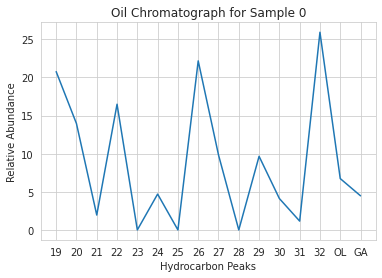

In [102]:
fig = plt.figure()
plt.plot(df.iloc[0, 3:])
plt.title(f"Oil Chromatograph for Sample 0")
plt.ylabel('Relative Abundance')
plt.xlabel('Hydrocarbon Peaks')
plt.show()

Заметим, что данные потребуется нормализовать

Посмотрим на 3 разные лаборатории по образцам:

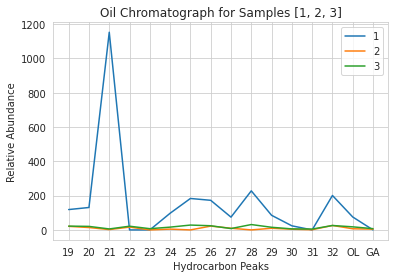

In [103]:
lab = [1,2,3]
fig = plt.figure()
for i in [1,0,4]:
    plt.plot(df.iloc[i, 3:])
    
plt.title(f"Oil Chromatograph for Samples {lab}")
plt.ylabel('Relative Abundance')
plt.xlabel('Hydrocarbon Peaks')
plt.legend(lab, loc='upper right')
plt.show()

Заметим, что потребуется избавиться от выбросов в столбце 21

## Очистка данных

Нулям присвоим среднее значение по столбцам выборки

In [104]:
df=df.mask(df == 0, np.nan).fillna(df.mean())
df.head(5)

,Lab,y,x,19,20,21,22,23,24,25,26,27,28,29,30,31,32,OL,GA
Sample,,,,,,,,,,,,,,,,,,,
0,Lab_2,380,590,20.763486,13.947363,1.952259,16.486101,13.374795,4.700927,70.218122,22.170079,9.838302,81.303271,9.655032,4.117457,1.156801,25.926844,6.734488,4.471749
1,Lab_1,140,470,118.643361,130.716833,1152.234830,54.686017,13.374795,97.190520,183.275260,172.616987,74.513555,227.625892,85.241758,23.851172,33.190267,200.715642,75.290342,25.735842
2,Lab_1,350,440,123.998274,119.186570,287.763588,157.329488,9.416534,66.115133,116.153357,141.570068,30.570730,195.406313,51.625043,19.935382,57.203727,78.360287,42.262010,33.352354
3,Lab_2,790,160,13.753847,18.599869,1555.472651,9.205427,7.676030,23.369460,18.861401,55.719074,6.889721,18.959263,6.308057,8.018402,33.190267,18.181328,5.072130,15.635603
4,Lab_3,240,600,22.143712,20.548714,5.660628,21.590330,7.199149,16.221228,28.281983,24.309612,7.921879,31.266928,15.366561,6.013449,5.000000,25.824537,17.897014,7.305632


Уменьшим выбросы в столбце 21:

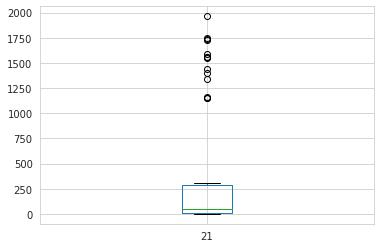

In [105]:
df.boxplot('21')

In [106]:
for x in ['21']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = min
    df.loc[df[x] > max,x] = max

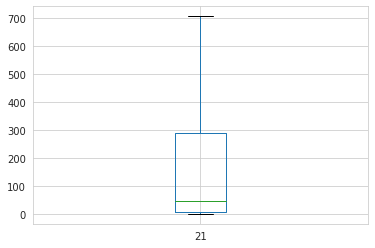

In [107]:
df.boxplot('21')

Масштабируем данные:

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.iloc[:, 3:])
df_test = scaler.transform(df.iloc[:, 3:])
df_test

array([[-0.61247781, -0.77445317, -0.79673386, ..., -0.61000184,
        -0.57288453, -0.68657918],
       [ 0.9669531 ,  1.20690345,  1.9595306 , ...,  1.15907769,
         1.00593087, -0.0822803 ],
       [ 1.05336223,  1.01125675,  0.32178448, ..., -0.07931033,
         0.24530086,  0.13417143],
       ...,
       [ 2.7189316 ,  2.23333865, -0.57039589, ...,  2.1408912 ,
         2.38560913,  1.04170128],
       [ 2.21969965,  1.71969003,  0.32178448, ...,  1.06916962,
         3.35571162, -0.0822803 ],
       [ 0.9669531 ,  1.20690345,  1.9595306 , ...,  1.15907769,
         1.00593087, -0.0822803 ]])

# Создание тестовых данных

Примерных данных геохимии недостаточно для построения модели, слишком маленькой и без меток. Следовательно, нам нужно создать набор синтетических геохимических данных с метками и подходящего размера. Затем этот синтетический набор данных можно использовать для обучения модели.

Синтетический набор будем создавать на основе файла, содержащего среднее и стандартное отклонение для каждого столбца (19-GA) для четырех нефтяных семей.

## Создание синтетического набора данных

In [109]:
geochem_database = pd.read_csv('global_ranges_oil_families.csv')
geochem_database

,Parameter,mean,stdev,family
0,19,22.015064,3.147094,I_Ordovician
1,20,14.784672,7.595627,I_Ordovician
2,21,1.708241,0.857020,I_Ordovician
3,22,16.744960,3.123742,I_Ordovician
4,23,1.826882,2.855366,I_Ordovician
...,...,...,...,...
59,30,2.743475,3.586975,II_Marine
60,31,2.082343,3.910173,II_Marine
61,32,23.424840,3.187926,II_Marine
62,OL,6.450078,3.734864,II_Marine


Для набора обучающих данных вам понадобится не менее 100 строк каждого типа семейства, поэтому требуется построить функцию, которая будет генерировать синтетический набор.

In [110]:
synthetic_X = []
synthetic_y = []
families = []

families.append(geochem_database.iloc[:16])
families.append(geochem_database.iloc[16:32])
families.append(geochem_database.iloc[32:48])
families.append(geochem_database.iloc[48:64])


for family in range(4):
    for i in range(100):
        synthetic = []
        for i in range(families[family].shape[0]):
            x = np.random.normal(families[family].iloc[i,1], families[family].iloc[i,2])
            synthetic.append(x)
        synthetic_X.append(synthetic)
        synthetic_y.append(family)

## Разделение данных и масштабирование

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(synthetic_X, synthetic_y, test_size=0.35)

In [112]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Обучение моделей

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

## Метод k-ближайших соседей (K-Nearest Neighbors)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  0  0  0]
 [ 0 39  0  0]
 [ 0  0 35  0]
 [ 0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        32

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



## Классификатор дерева решений (Decision Tree Classifier)

In [115]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  0  0  0]
 [ 0 38  1  0]
 [ 0  0 35  0]
 [ 0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.97      0.99        39
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        32

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



## Метод опорных векторов (Support Vector Machines)

In [116]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  0  0  0]
 [ 0 39  0  0]
 [ 0  0 35  0]
 [ 0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        32

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



# Использование обученной модели

Лучший результат на обучении дал алгоритм Support Vector Machines, поэтому именно его будем использовать для решения поставленной задачти.

In [117]:
y_pred = clf.predict(df_test).tolist()

In [118]:
for i in range(len(y_pred)):
    if (y_pred[i] == 0): y_pred[i] = 'I_Ordovician'
    if (y_pred[i] == 1): y_pred[i] = 'III_Deltaic'
    if (y_pred[i] == 2): y_pred[i] = 'I_Lacustrine'
    if (y_pred[i] == 3): y_pred[i] = 'II_Marine'

In [ ]:
y_pred

In [120]:
pd.DataFrame(y_pred).to_csv('contestant_submission_example.csv', index=False, header=['family'])